In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten
from keras.models import Sequential
from keras.applications.xception import Xception
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [2]:
train_dir = '../Data/oidminifar/train/'
test_dir = '../Data/oidminifar/test/'

# train_idg = ImageDataGenerator(
#           rescale=1./255,
#           rotation_range=40,
#           width_shift_range=0.2,
#           height_shift_range=0.2,
#           shear_range=0.2,
#           zoom_range=0.2,
#           horizontal_flip=True)
train_idg = ImageDataGenerator(rescale=1./255)
test_idg = ImageDataGenerator(rescale=1./255)

In [3]:
train_gen = train_idg.flow_from_directory(train_dir,
                                          batch_size=25,
                                          target_size=(299, 299))
test_gen = test_idg.flow_from_directory(test_dir,
                                        batch_size=25,
                                        target_size=(299, 299))

Found 2500 images belonging to 5 classes.
Found 1250 images belonging to 5 classes.


In [4]:
base = Xception(include_top=False, input_shape=(299, 299, 3), pooling='avg')
model = Sequential()
model.add(base)
model.add(Dense(256, activation='relu'))
model.add(Dense(5, name='prediction'))
model.add(Activation('softmax'))

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 2048)              20861480  
_________________________________________________________________
dense_1 (Dense)              (None, 256)               524544    
_________________________________________________________________
prediction (Dense)           (None, 5)                 1285      
_________________________________________________________________
activation_1 (Activation)    (None, 5)                 0         
Total params: 21,387,309
Trainable params: 21,332,781
Non-trainable params: 54,528
_________________________________________________________________


In [6]:
base.trainable = False
len(model.trainable_weights)

4

In [7]:
model_type = 'xception'
model_name = 'oidminifar_%s_model.{epoch:03d}.h5' % model_type
dirpath = 'oidminifar_saved_models/'
filepath = dirpath + model_name

Path(dirpath).mkdir(parents=True, exist_ok=True)

checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True)

In [8]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [10]:
history = model.fit_generator(train_gen, validation_data=test_gen, workers=8, callbacks=[checkpoint],
                              epochs=10, steps_per_epoch=100, validation_steps=50)

Epoch 1/10
100/100 [==============================] - 42s 419ms/step - loss: 0.1670 - acc: 0.9402 - val_loss: 0.0521 - val_acc: 0.9848

Epoch 00001: val_acc improved from -inf to 0.98480, saving model to oidminifar_saved_models/oidminifar_xception_model.001.h5
Epoch 2/10
100/100 [==============================] - 37s 371ms/step - loss: 0.0711 - acc: 0.9757 - val_loss: 0.0291 - val_acc: 0.9930

Epoch 00002: val_acc improved from 0.98480 to 0.99296, saving model to oidminifar_saved_models/oidminifar_xception_model.002.h5
Epoch 3/10
100/100 [==============================] - 37s 371ms/step - loss: 0.0555 - acc: 0.9804 - val_loss: 0.0372 - val_acc: 0.9890

Epoch 00003: val_acc did not improve from 0.99296
Epoch 4/10
100/100 [==============================] - 37s 372ms/step - loss: 0.0409 - acc: 0.9854 - val_loss: 0.0444 - val_acc: 0.9848

Epoch 00004: val_acc did not improve from 0.99296
Epoch 5/10
100/100 [==============================] - 37s 372ms/step - loss: 0.0380 - acc: 0.9875 - val

In [9]:
x_test = np.load('../Data/bird_bicycle_test.npy')
x_test = x_test / 255
y_test = np.zeros(1000, dtype='int8')
y_test[:500] = 1

In [10]:
model.evaluate(x_test, y_test)

1000/1000 [==============================] - 12s 12ms/step


[0.007404523270088248, 0.999]

In [11]:
model.save('../Saved_models/birds_xception.h5')

In [26]:
res = model.predict(x_test)
res = (res > 0.5).astype(int).reshape(1000)

In [31]:
np.where(y_test != res)

(array([78]),)

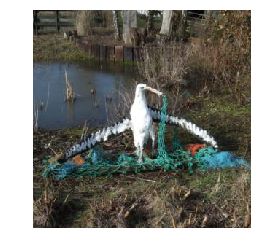

In [37]:
plt.axis('off')
plt.imshow(x_test[78])

In [36]:
model.predict(x_test[78].reshape(1, 299, 299, 3))

array([[0.205703]], dtype=float32)